# Simple Linear Regression example

This notebook show you different ways of solving Univariate Linear Regression with example data.

## Simple Linear Regression

We are going to use one variable $x$ to predict some values $y$. We will compare the results obtained with Scikit-Learn library with those obtained with the algebraic solution and the gradient descent algorithm.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from random import uniform
from sklearn.metrics import mean_absolute_error
# from tqdm import tqdm

Lets create some synthetic data to illustrate Simple Linear Regression.

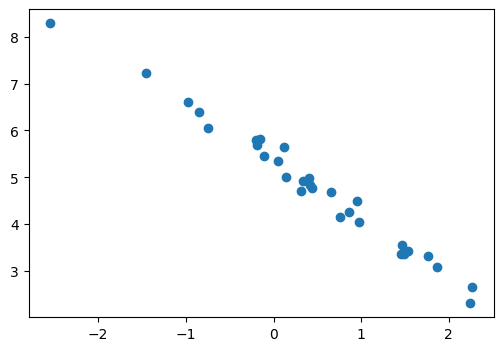

In [4]:
# Random seed and sample size
np.random.seed(0)
m = 30
# Synthetic weights
intercept = 5.4
slope = -1.2
# Linear function
f = lambda x: intercept + slope * x
# Generate data and add some noise
x = np.random.randn(m)
y = f(x) + np.random.randn(m) * 0.2   # Here y = f(x) + some random noise
# Reshape for sklearn
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
# Plot training data
plt.figure(figsize=(6, 4));
plt.scatter(x, y);

In [5]:
x.shape, y.shape

((30, 1), (30, 1))

### Scikit-Learn

First, we fit a linear regression model and obtain the coeffcients with Scikit-Learn.

In [6]:
model = LinearRegression()
model.fit(x, y)
print(model.intercept_, model.coef_)

[5.35776844] [[-1.23539027]]


We can see the model parameters obtained with scikit-learn are close enough to the intercept and the slope used to generate the data.

$\hat{y} = 5.3578 - 1.2354 x$

In [7]:
model.predict(np.array([1,2,3]).reshape(-1,1))

array([[4.12237817],
       [2.88698789],
       [1.65159762]])

### Algebraic solution

Your turn now is to compute $\theta_0$ and $\theta_1$ with the equations for univariate linear regression.

$$\overline{x} = \frac{1}{m} \sum_{i=1}^m{x^{(i)}}$$
$$\overline{y} = \frac{1}{m} \sum_{i=1}^m{y^{(i)}}$$
$$S_{xx} = \frac{1}{m} \sum_{i=1}^m{(x^{(i)}-\overline{x})(x^{(i)}-\overline{x})}$$
$$S_{xy} = \frac{1}{m} \sum_{i=1}^m{(x^{(i)}-\overline{x})(y^{(i)}-\overline{y})}$$
$$\theta_1 = \frac{S_{xy}}{S_{xx}}$$
$$\theta_0 = \overline{y} - \theta_1 \overline{x}$$

Once you obtain those parameters compute the residuals of the training data and plot the points with the fitted line.

In [8]:
x_m = sum(x) / len(x)
y_m = sum(y) / len(y)
x_m, y_m

(array([0.44285645]), array([4.81066789]))

In [9]:
SSxx = sum([(x[index] - x_m)*(x[index] - x_m) for index in range(len(x))]) / len(x)
SSxy = sum([(x[index] - x_m)*(y[index] - y_m) for index in range(len(x))]) / len(y)
SSxx, SSxy

(array([1.1703652]), array([-1.44585779]))

In [10]:
theta1 = SSxy / SSxx
theta0 = y_m - (theta1*x_m)
theta0, theta1

(array([5.35776844]), array([-1.23539027]))

We can see that the values obtained with the algebraic solution are very close to those obtained with scikit-learn. Now, let's plot the data points with the fitted line.

In [11]:
def plot_line(x, y, theta0, theta1, title='Simple Linear Regression'):
    plt.figure(figsize=(6, 4))
    ax = plt.axes()
    ax.scatter(x, y)
    x_line = np.linspace(np.min(x), np.max(x), 100)
    y_line = theta0 + theta1 * x_line
    ax.set_title(title)
    ax.plot(x_line, y_line, '-r');  

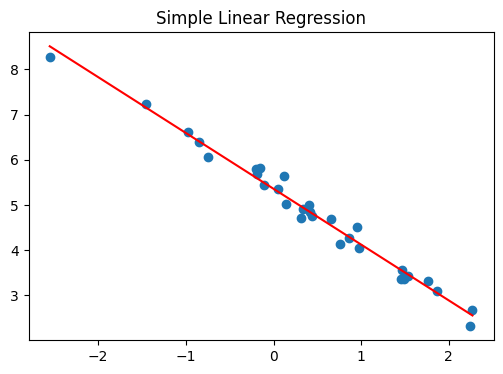

In [12]:
plot_line(x, y, theta0, theta1)

### Gradient Descent for LR

Now, you should implement the gradient descent algorithm to train a simple linear regression model.

* Define a variable for the learning rate $\alpha$ and try with different values (i.e. 0.01, 0.1).
* Initialize $\theta_0$ and $\theta_1$ with random values (after it works also try initializing with zeros to see what happens).
* Define a maximum number of iterations.
* Plot the training error after each epoch (full pass over the data).
* Plot in 3D the value of $J(\theta_0, \theta_1)$ as a function of the parameters.

Text(0.5, 1.0, 'Mean Absolute Error')

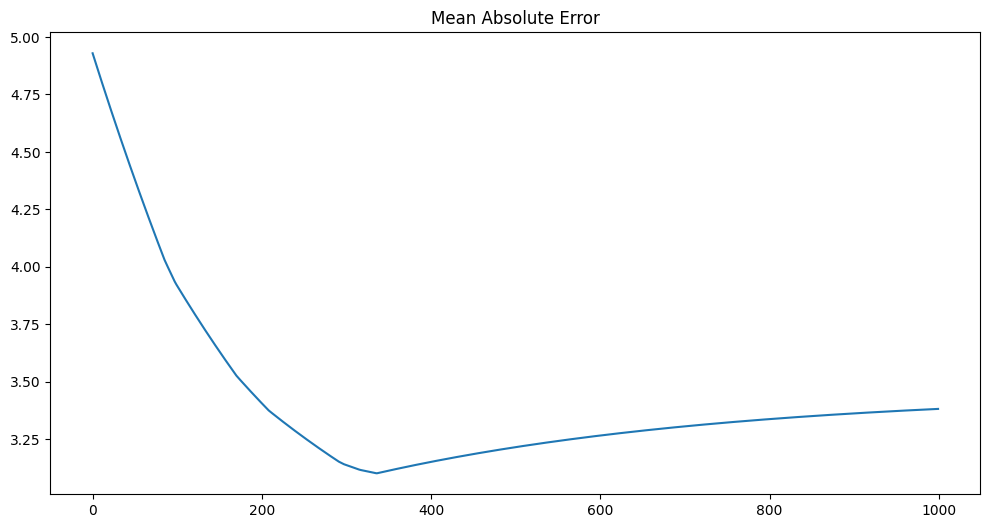

In [39]:
# ===== Data preparation
np.random.seed(0)
m = 30
intercept = 5.4
slope = -1.2
f = lambda x: intercept + slope * x
x = np.random.randn(m)
y = f(x) + np.random.randn(m) * 0.2
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# ===== Model
model = lambda equis, t0, t1: t0 + t1 * equis

# ===== Gradient Descent
learning_rate = 0.001
iterations = 1000
T0 = lambda t0, t1, lr: t0 - (lr * np.mean((model(x,t0,t1) - y)))
T1 = lambda t0, t1, lr: t1 - (lr * np.mean((model(x,t0,t1) - y)) * x)
theta0, theta1 = uniform(-1,1), uniform(-1,1)

# ===== Iterations
errors = []
for _ in range(iterations):
    theta0 = T0(theta0,theta1,learning_rate)
    theta1 = T1(theta0,theta1,learning_rate)
    errors.append(mean_absolute_error(y,model(x,theta0,theta1)))

# print(f"theta0: {theta0}\ntheta1{theta1}")

# ===== Plotting
plt.figure(figsize=(12,6))
plt.plot([_ for _ in range(iterations)],errors)
plt.title('Mean Absolute Error')
